In [1]:
import numpy as np 
import pandas as pd
import networkx as nx
import plotly.express as px 
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
hava_kalite_data = pd.read_csv('air_index.csv')

In [3]:
hava_kalite_data.head() 

,Rank,Countries,City,2022,JAN,FEB,MAR,APR,MAY,JUN,...,AUG,SEP,OCT,NOV,DEC,2021,2020,2019,2018,2017
0,1,Pakistan,Lahore,97.4,133.0,102.5,85.6,69.3,60.9,52.1,...,46.2,64.2,123.2,190.5,192.9,86.5,79.2,89.5,114.9,133.2
1,2,China,Hotan,94.3,61.7,91.6,132.7,106.2,120.5,69.5,...,75.0,65.1,75.0,50.3,120.0,101.5,110.2,110.1,116.0,91.9
2,3,India,Bhiwadi,92.7,110.6,98.0,116.2,149.5,123.8,102.8,...,36.5,59.9,85.4,111.4,86.9,106.2,95.5,83.4,125.4,NaN
3,4,India,Delhi (NCT),92.6,141.0,100.9,91.0,98.0,73.2,56.2,...,31.1,38.3,99.7,176.8,171.9,96.4,84.1,98.6,113.5,108.2
4,5,Pakistan,Peshawar,91.8,110.2,103.5,78.3,68.5,53.5,56.3,...,57.8,79.0,100.0,132.0,212.1,89.6,NaN,63.9,NaN,NaN


In [4]:
df=hava_kalite_data[["Rank",	"Countries",	"City",	"2022","2021",	"2020",	"2019",	"2018",	"2017","JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]]

Rank değeri hava kalitesinin derecesini belirtiyor.

In [5]:
df.head()

,Rank,Countries,City,2022,2021,2020,2019,2018,2017,JAN,...,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1,Pakistan,Lahore,97.4,86.5,79.2,89.5,114.9,133.2,133.0,...,85.6,69.3,60.9,52.1,47.8,46.2,64.2,123.2,190.5,192.9
1,2,China,Hotan,94.3,101.5,110.2,110.1,116.0,91.9,61.7,...,132.7,106.2,120.5,69.5,172.5,75.0,65.1,75.0,50.3,120.0
2,3,India,Bhiwadi,92.7,106.2,95.5,83.4,125.4,NaN,110.6,...,116.2,149.5,123.8,102.8,38.8,36.5,59.9,85.4,111.4,86.9
3,4,India,Delhi (NCT),92.6,96.4,84.1,98.6,113.5,108.2,141.0,...,91.0,98.0,73.2,56.2,34.3,31.1,38.3,99.7,176.8,171.9
4,5,Pakistan,Peshawar,91.8,89.6,NaN,63.9,NaN,NaN,110.2,...,78.3,68.5,53.5,56.3,51.8,57.8,79.0,100.0,132.0,212.1


In [6]:
df.iloc[2].fillna(0)

Rank               3
Countries      India
City         Bhiwadi
2022            92.7
2021           106.2
2020            95.5
2019            83.4
2018           125.4
2017               0
JAN            110.6
FEB             98.0
MAR            116.2
APR            149.5
MAY            123.8
JUN            102.8
JUL             38.8
AUG             36.5
SEP             59.9
OCT             85.4
NOV            111.4
DEC             86.9
Name: 2, dtype: object

In [7]:
#Eksik değerleri bir önceki değerler ile doldurdum
df=df.fillna(method="ffill")

In [8]:
#NaN değere sahip satırları sildim
df.dropna(axis=0)

,Rank,Countries,City,2022,2021,2020,2019,2018,2017,JAN,...,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1,Pakistan,Lahore,97.4,86.5,79.2,89.5,114.9,133.2,133.0,...,85.6,69.3,60.9,52.1,47.8,46.2,64.2,123.2,190.5,192.9
1,2,China,Hotan,94.3,101.5,110.2,110.1,116.0,91.9,61.7,...,132.7,106.2,120.5,69.5,172.5,75.0,65.1,75.0,50.3,120.0
2,3,India,Bhiwadi,92.7,106.2,95.5,83.4,125.4,91.9,110.6,...,116.2,149.5,123.8,102.8,38.8,36.5,59.9,85.4,111.4,86.9
3,4,India,Delhi (NCT),92.6,96.4,84.1,98.6,113.5,108.2,141.0,...,91.0,98.0,73.2,56.2,34.3,31.1,38.3,99.7,176.8,171.9
4,5,Pakistan,Peshawar,91.8,89.6,84.1,63.9,113.5,108.2,110.2,...,78.3,68.5,53.5,56.3,51.8,57.8,79.0,100.0,132.0,212.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7318,7319,USA,Castroville,0.8,7.5,8.0,5.5,6.0,8.1,0.3,...,0.4,0.6,0.5,1.0,0.6,0.9,1.5,1.5,1.7,1.4
7319,7320,USA,Wilson,0.8,7.7,8.0,5.5,6.0,8.1,0.9,...,0.5,0.6,0.5,0.8,1.2,1.4,1.1,1.1,0.8,0.6
7320,7321,USA,Roanoke Rapids,0.6,2.9,8.0,7.1,6.0,8.1,0.8,...,0.5,0.4,0.5,0.6,0.5,0.3,0.5,0.7,0.6,0.8
7321,7322,Indonesia,Kuta,0.5,9.8,13.0,7.1,6.0,8.1,2.3,...,0.3,0.5,0.6,0.5,0.3,0.4,0.3,0.2,0.4,0.3


In [9]:
dftr=df[df["Countries"]=="Turkey"]

In [10]:
dftr.head(5)

,Rank,Countries,City,2022,2021,2020,2019,2018,2017,JAN,...,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
82,83,Turkey,Igdir,53.0,66.2,49.2,59.0,76.1,74.1,132.8,...,21.9,24.1,11.6,14.5,15.7,22.3,25.0,36.4,123.8,129.2
238,239,Turkey,Gaziantep,40.2,27.3,47.0,52.6,57.6,70.5,73.8,...,42.7,30.8,15.6,19.6,15.9,21.1,22.5,25.6,46.5,77.0
296,297,Turkey,Duzce,36.8,44.4,33.3,46.0,51.4,62.6,81.5,...,33.0,31.9,20.0,19.7,19.1,15.7,16.3,33.6,57.0,59.7
324,325,Turkey,Mersin,35.3,32.5,24.7,34.4,65.2,88.7,53.4,...,38.4,31.4,21.8,24.7,22.6,28.1,30.9,25.2,28.8,55.8
349,350,Turkey,Konya,34.5,33.8,30.7,33.2,45.3,48.5,72.4,...,22.8,29.8,18.1,17.6,16.3,20.9,22.8,25.3,48.3,66.6


In [11]:
dftr.tail(5)

,Rank,Countries,City,2022,2021,2020,2019,2018,2017,JAN,...,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
2187,2188,Turkey,Bagirkanli,12.1,11.0,10.5,11.6,12.5,10.4,10.7,...,14.8,13.5,10.0,7.5,7.5,13.0,10.5,11.4,15.5,14.5
2215,2216,Turkey,Bilecik,12.0,16.4,15.8,17.8,13.9,15.3,18.7,...,14.8,9.9,7.2,7.3,7.4,11.0,10.0,9.3,15.3,15.9
2879,2880,Turkey,Kireshir,10.5,9.8,9.4,10.9,12.8,13.5,19.8,...,8.9,11.9,6.9,14.6,8.1,5.2,4.5,3.3,11.3,14.1
3818,3819,Turkey,Cankiri,9.1,9.3,19.5,19.7,10.1,8.9,13.3,...,7.0,10.3,6.3,7.1,6.2,7.5,6.2,4.5,12.2,12.3
5757,5758,Turkey,Kuyulusebil,6.6,7.3,6.9,7.2,7.0,8.4,9.3,...,5.8,11.5,3.9,3.9,5.5,5.5,7.5,4.7,7.1,3.8


In [12]:
#Her ülke için ortalama değeri hesapladım
dfgr=df.groupby(by=["Countries"]).mean()

In [13]:
dfgr.head(3)

,Rank,2022,2021,2020,2019,2018,2017,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Countries,,,,,,,,,,,,,,,,,,,
Afghanistan,1347.0,17.1,37.5,46.5,58.8,61.8,25.0,54.9,28.5,8.7,9.2,7.5,10.2,8.3,7.4,12.6,12.6,23.5,33.9
Albania,1698.0,14.5,12.5,16.0,7.6,22.9,26.5,20.1,18.6,18.1,11.5,11.8,11.2,11.7,10.3,7.9,13.6,14.6,22.8
Algeria,1260.0,17.8,20.0,20.2,21.2,21.7,29.6,22.6,17.5,22.5,15.0,16.8,16.1,15.8,16.1,16.3,14.0,17.2,19.0


In [14]:
dfgr["2022"].sort_values()

Countries
Guam                    1.300000
French Polynesia        2.500000
U.S. Virgin Islands     2.850000
Bermuda                 3.000000
Bonaire                 3.300000
                         ...    
Burkina Faso           63.000000
Bangladesh             65.800000
Bahrain                66.600000
Pakistan               69.257143
Chad                   89.700000
Name: 2022, Length: 133, dtype: float64

<AxesSubplot:xlabel='Countries'>

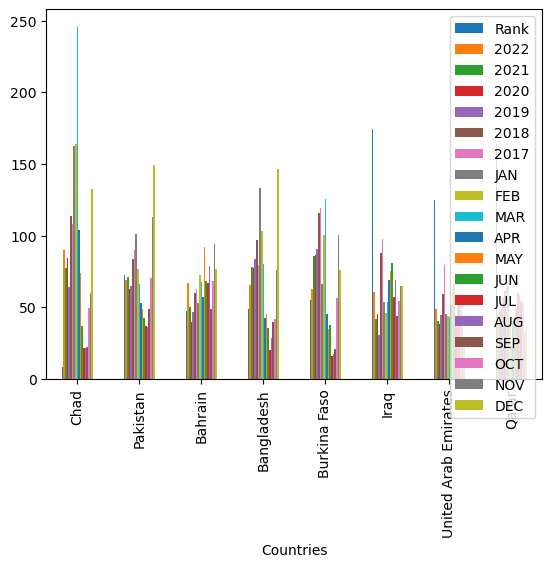

In [15]:
#İlk 8 satırın 2022-2021 sıralaması
dfgr.sort_values(by=["2022","2021"],ascending=False).iloc[:8].plot.bar()

<AxesSubplot:>

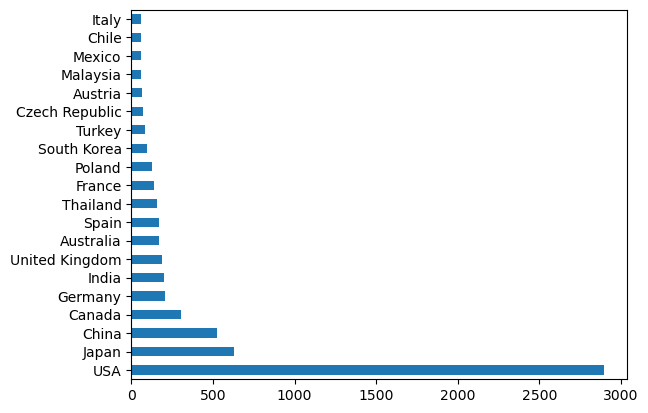

In [16]:
#Veritabanında en fazla bulunan ilk 20 ülkenin sıralamasını oluşturdum
df["Countries"].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

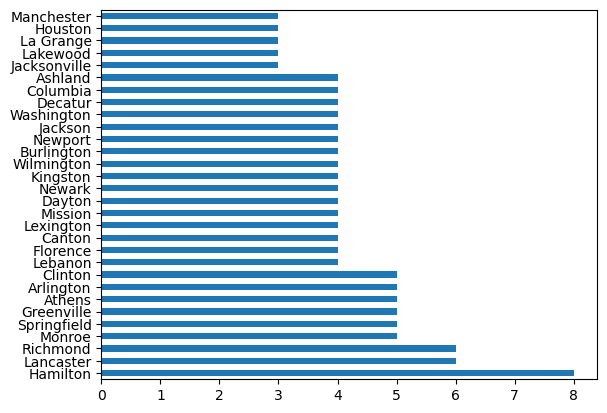

In [17]:
#Veritabanında en fazla bulunan ilk 30 şehrin sıralamasını oluşturdum
df["City"].value_counts()[:30].plot(kind='barh')

In [18]:
#2022 yılının değerleri ile diğer yılların karşılaştırmasını yaptım
df["delta2217"] = df["2022"] - df["2017"]
df["delta2218"] = df["2022"] - df["2018"]
df["delta2219"] = df["2022"] - df["2019"]
df["delta2220"] = df["2022"] - df["2020"]
df["delta2221"] = df["2022"] - df["2021"]

In [19]:
#ülke ve şehir bazında yıllara ve değişimlere göre ortalama hava kalitesini inceledim
dff = pd.pivot_table(df, values = ["2017", "2018", "2019", "2020", '2021',"2022", "delta2217", "delta2218", "delta2219", "delta2220", "delta2221"], 
                     index=["Countries", "City"],
                    aggfunc={'2021': np.mean, '2022': np.mean, '2020': np.mean, '2019': np.mean, '2018': np.mean, 
                             '2017': np.mean, "delta2217":np.mean, "delta2218":np.mean, "delta2219":np.mean, 
                             "delta2220":np.mean, "delta2221":np.mean})

In [20]:
dff

2017  2018  2019  2020  2021  2022  delta2217  \
Countries   City                                                                
Afghanistan Kabul               25.0  61.8  58.8  46.5  37.5  17.1       -7.9   
Albania     Tirana              26.5  22.9   7.6  16.0  12.5  14.5      -12.0   
Algeria     Algiers             29.6  21.7  21.2  20.2  20.0  17.8      -11.8   
Andorra     Ordino               5.7   6.1   7.1   7.4   7.3   5.4       -0.3   
Angola      Luanda              13.1  10.4  15.9  13.0  11.0   8.8       -4.3   
...                              ...   ...   ...   ...   ...   ...        ...   
Vietnam     Thanh Pho Lang Son  26.5  22.9   7.6  11.2  36.8  14.6      -11.9   
            Thu Duc             41.5  33.3  19.6  13.6  20.1  24.5      -17.0   
            Tra Vinh             5.7   6.1   7.1   5.6   6.2   5.5       -0.2   
            Trang Bang           8.3   7.9   8.6   6.4  14.1  12.9        4.6   
Zambia      Lusaka              36.5  28.9  24.3  23.9  24.6  24.6      -11.9   

                                delta2218  delta2219  delta2220  delta2221  
Countries   City                                                            
Afghanistan Kabul                   -44.7      -41.7      -29.4      -20.4  
Albania     Tirana                   -8.4        6.9       -1.5        2.0  
Algeria     Algiers                  -3.9       -3.4       -2.4       -2.2  
Andorra     Ordino                   -0.7       -1.7       -2.0       -1.9  
Angola      Luanda                   -1.6       -7.1       -4.2       -2.2  
...                                   ...        ...        ...        ...  
Vietnam     Thanh Pho Lang Son       -8.3        7.0        3.4      -22.2  
            Thu Duc                  -8.8        4.9       10.9        4.4  
            Tra Vinh                 -0.6       -1.6       -0.1       -0.7  
            Trang Bang                5.0        4.3        6.5       -1.2  
Zambia      Lusaka                   -4.3        0.3        0.7        0.0  

[6985 rows x 11 columns]

In [21]:
hava_kalite_data.head() 

,Rank,Countries,City,2022,JAN,FEB,MAR,APR,MAY,JUN,...,AUG,SEP,OCT,NOV,DEC,2021,2020,2019,2018,2017
0,1,Pakistan,Lahore,97.4,133.0,102.5,85.6,69.3,60.9,52.1,...,46.2,64.2,123.2,190.5,192.9,86.5,79.2,89.5,114.9,133.2
1,2,China,Hotan,94.3,61.7,91.6,132.7,106.2,120.5,69.5,...,75.0,65.1,75.0,50.3,120.0,101.5,110.2,110.1,116.0,91.9
2,3,India,Bhiwadi,92.7,110.6,98.0,116.2,149.5,123.8,102.8,...,36.5,59.9,85.4,111.4,86.9,106.2,95.5,83.4,125.4,NaN
3,4,India,Delhi (NCT),92.6,141.0,100.9,91.0,98.0,73.2,56.2,...,31.1,38.3,99.7,176.8,171.9,96.4,84.1,98.6,113.5,108.2
4,5,Pakistan,Peshawar,91.8,110.2,103.5,78.3,68.5,53.5,56.3,...,57.8,79.0,100.0,132.0,212.1,89.6,NaN,63.9,NaN,NaN


In [22]:
hava_kalite_data.tail()

,Rank,Countries,City,2022,JAN,FEB,MAR,APR,MAY,JUN,...,AUG,SEP,OCT,NOV,DEC,2021,2020,2019,2018,2017
7318,7319,USA,Castroville,0.8,0.3,0.4,0.4,0.6,0.5,1.0,...,0.9,1.5,1.5,1.7,1.4,7.5,NaN,NaN,NaN,NaN
7319,7320,USA,Wilson,0.8,0.9,0.8,0.5,0.6,0.5,0.8,...,1.4,1.1,1.1,0.8,0.6,7.7,NaN,NaN,NaN,NaN
7320,7321,USA,Roanoke Rapids,0.6,0.8,0.7,0.5,0.4,0.5,0.6,...,0.3,0.5,0.7,0.6,0.8,2.9,NaN,7.1,NaN,NaN
7321,7322,Indonesia,Kuta,0.5,2.3,0.9,0.3,0.5,0.6,0.5,...,0.4,0.3,0.2,0.4,0.3,9.8,13.0,NaN,NaN,NaN
7322,7323,USA,Arch Cape,0.2,0.2,0.1,0.1,0.1,0.1,0.1,...,0.1,0.3,0.3,0.8,1.0,NaN,NaN,NaN,NaN,NaN


In [23]:
data_selected = hava_kalite_data[
    ["Rank", 
     "Countries", 
     "City", 
     "2022", 
     "JAN", 
     "FEB", 
     "MAR", 
     "APR",
     "MAY",
     "JUN",       
     "AUG", 
     "SEP",     
     "OCT",                
     "NOV",             
     "DEC"  ]
    ]

In [24]:
G = nx.Graph()

In [25]:
for index, row in hava_kalite_data.iterrows():
    country = row["Countries"]
    rank = row["Rank"]
    
    # Ülke düğümlerini ekledim
    G.add_node(country, rank=rank)
    
    # Her Ülkeyi "Rank" düğümüne bağladım
    G.add_edge("Rank", country, weight=rank)

In [26]:
# Grafı çizdirdim
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [27]:
# Düğüm renklerini kenar uzaklıklarına göre belirlemek için renk haritası oluşturuyorum
node_ranks = [G.nodes[node]["rank"] for node in G.nodes()]
max_rank = max(node_ranks)
node_colors = [rank / max_rank for rank in node_ranks]

KeyError: 'rank'

In [ ]:
for node in G.nodes():
    print(G.nodes[node])

{'rank': 233}
{}
{'rank': 6297}
{'rank': 7315}
{'rank': 8}
{'rank': 336}
{'rank': 7290}
{'rank': 47}
{'rank': 49}
{'rank': 55}
{'rank': 942}
{'rank': 524}
{'rank': 413}
{'rank': 179}
{'rank': 2934}
{'rank': 5758}
{'rank': 6963}
{'rank': 7322}
{'rank': 1573}
{'rank': 214}
{'rank': 566}
{'rank': 404}
{'rank': 170}
{'rank': 173}
{'rank': 7318}
{'rank': 2086}
{'rank': 6666}
{'rank': 398}
{'rank': 7248}
{'rank': 516}
{'rank': 252}
{'rank': 6868}
{'rank': 2203}
{'rank': 4175}
{'rank': 939}
{'rank': 7166}
{'rank': 7323}
{'rank': 383}
{'rank': 480}
{'rank': 2003}
{'rank': 5700}
{'rank': 537}
{'rank': 450}
{'rank': 1938}
{'rank': 2813}
{'rank': 4333}
{'rank': 1829}
{'rank': 5470}
{'rank': 594}
{'rank': 6665}
{'rank': 1771}
{'rank': 6945}
{'rank': 2346}
{'rank': 5867}
{'rank': 697}
{'rank': 721}
{'rank': 4171}
{'rank': 737}
{'rank': 7196}
{'rank': 765}
{'rank': 6864}
{'rank': 812}
{'rank': 840}
{'rank': 845}
{'rank': 2636}
{'rank': 1256}
{'rank': 903}
{'rank': 3124}
{'rank': 7020}
{'rank': 3292}

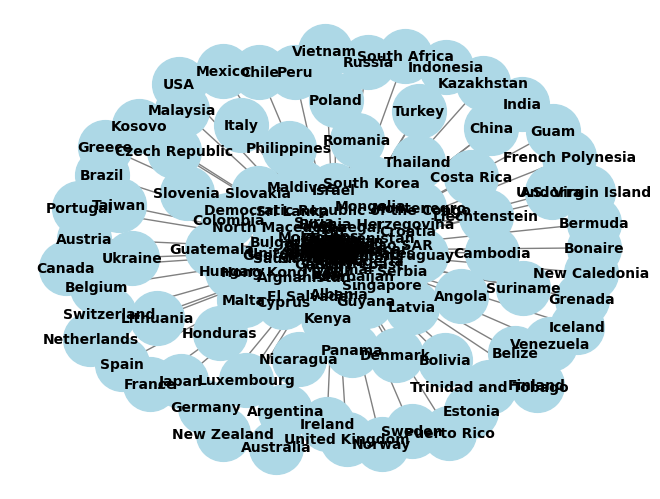

In [ ]:
# Grafik çizimi
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')

C:\Users\Didar\AppData\Local\Temp\ipykernel_11392\2831869143.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


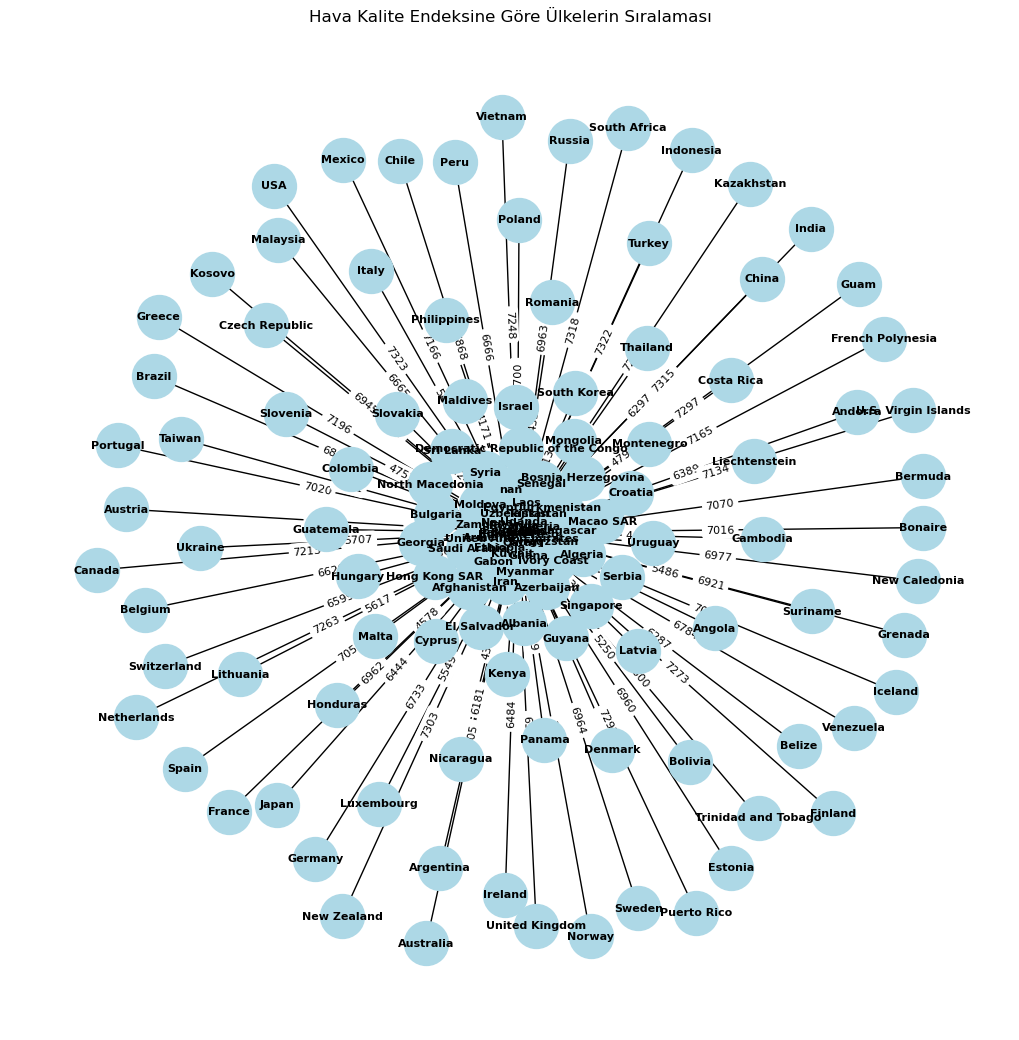

In [ ]:
# Grafı çizdirdim
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=8, font_weight='bold')

# Kenar etiketlerini ekledim
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Çizim
plt.title("Hava Kalite Endeksine Göre Ülkelerin Sıralaması")
plt.tight_layout()
plt.show()  

C:\Users\Didar\AppData\Local\Temp\ipykernel_6528\585900742.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


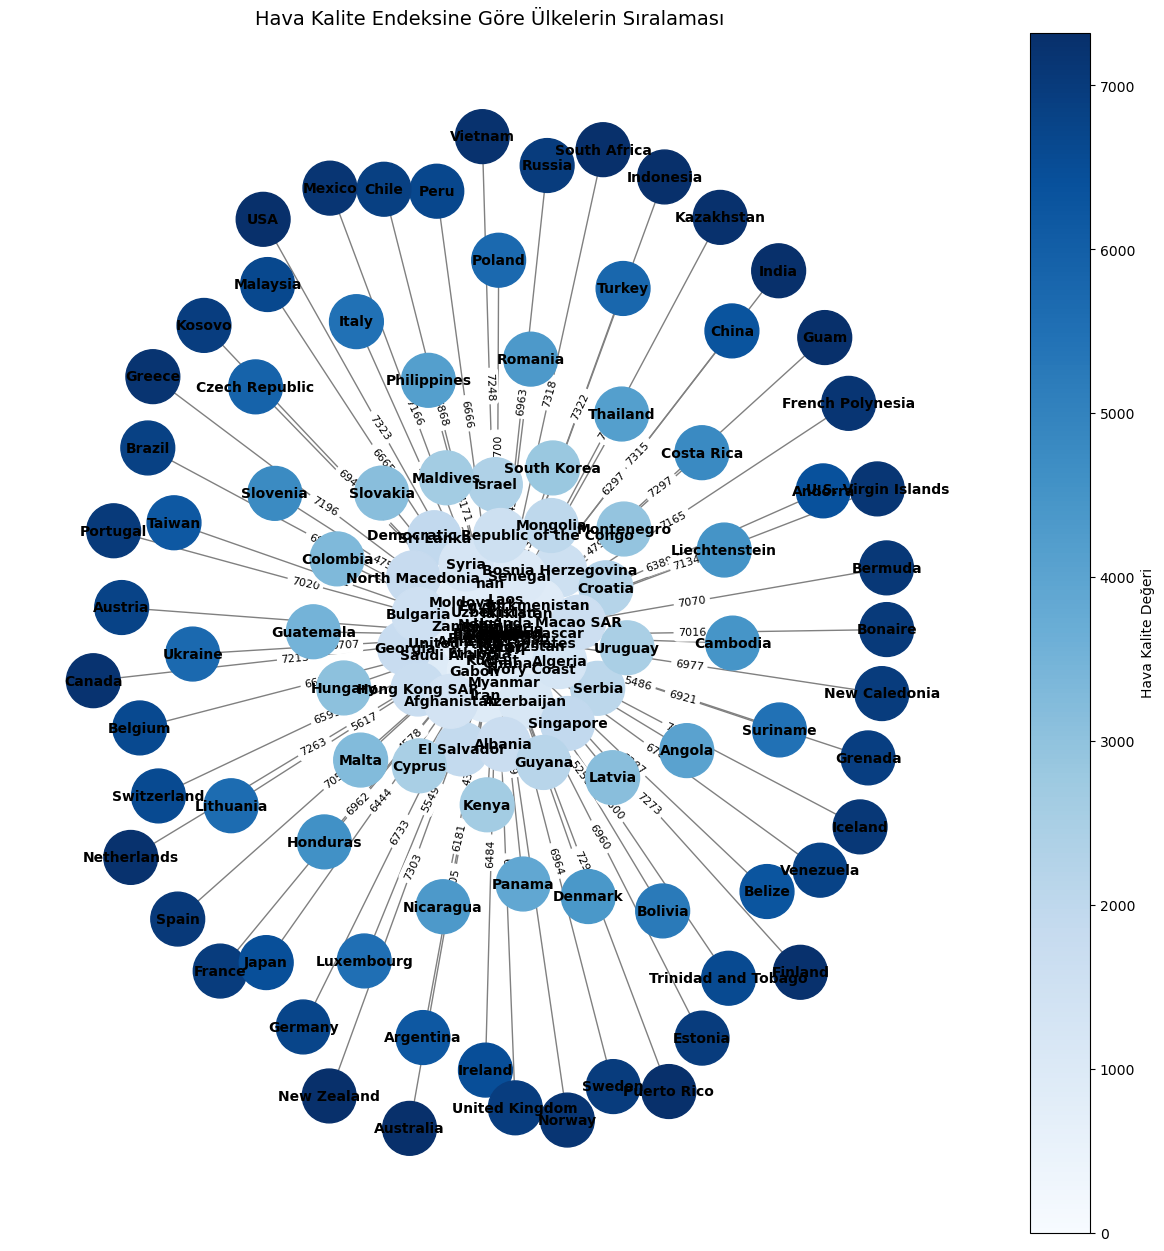

In [ ]:
# Grafı çizdirdim
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(12, 12))

# Düğüm renklerini kenar uzaklıklarına göre belirlemek için renk haritası oluşturuyorum
node_ranks = [G.nodes[node].get("rank", 0) for node in G.nodes()]
max_rank = max(node_ranks)
node_colors = [rank / max_rank for rank in node_ranks]

# Grafik çizimi
nx.draw(G, pos, with_labels=True, node_size=1500, node_color=node_colors, cmap='Blues', font_size=10, font_weight='bold', edge_color='gray')

# Kenar etiketlerini ekledim
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Grafiğin başlığını ekledim
plt.title("Hava Kalite Endeksine Göre Ülkelerin Sıralaması", fontsize=14)

# Eksenleri kapat
plt.axis('off')

# Renk çubuğunu ekle
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(node_ranks), vmax=max(node_ranks)))
sm._A = []
cbar = plt.colorbar(sm)
cbar.set_label('Hava Kalite Değeri')

# Grafiği göster
plt.tight_layout()
plt.show()


In [ ]:
country_data = pd.merge(px.data.gapminder(), hava_kalite_data, left_on='country', right_on='Countries')

In [ ]:
country_data = px.data.gapminder() 
country_data.tail()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298,ZWE,716


In [ ]:
help(px.scatter_geo)

Help on function scatter_geo in module plotly.express._chart_types:

scatter_geo(data_frame=None, lat=None, lon=None, locations=None, locationmode=None, geojson=None, featureidkey=None, color=None, text=None, symbol=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, size=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, symbol_sequence=None, symbol_map=None, opacity=None, size_max=None, projection=None, scope=None, center=None, fitbounds=None, basemap_visible=None, title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure
        In a geographic scatter plot, each row of `data_frame` is represented
        by a symbol mark on a map.
        
    Parameters
    ----------
    data_frame: 

In [ ]:
merged_data = pd.merge(country_data, hava_kalite_data, left_on='country', right_on='Countries')

In [ ]:
print(merged_data[['country', 'Rank']].head())

       country  Rank
0  Afghanistan  1347
1  Afghanistan  1347
2  Afghanistan  1347
3  Afghanistan  1347
4  Afghanistan  1347


In [ ]:
map_fig = px.choropleth(
    merged_data,
    locations='iso_alpha',
    color='Rank',  
    hover_name='country',
    projection='orthographic',
    title='Hava Kalite Endeksine Göre Ülkelerin Sıralaması',
    color_continuous_scale='Blues',  
)

map_fig.update_geos(
    showcoastlines=True,
    coastlinecolor="gray",
    showland=True,
    landcolor="lightgray",
    showocean=True,
    oceancolor="lightblue",
    showlakes=True,
    lakecolor="lightblue",
    showcountries=True,
    countrycolor="black"
)

frames = []
angles = np.linspace(0, 360, 30)  
for angle in angles:
    frames.append(dict(
        layout=dict(
            geo=dict(
                projection_rotation=dict(lon=angle, lat=30)  
            )
        )
    ))

map_fig.frames = frames
map_fig.update_layout(
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(label="Play",
                      method="animate",
                      args=[None, dict(frame=dict(duration=100, redraw=True), fromcurrent=True, mode='immediate')])]
    )]
)


map_fig.update_layout(coloraxis_colorbar=dict(
    title='Hava Kalite Değeri',
))

map_fig.show()

html_content = map_fig.to_html(full_html=False, include_plotlyjs='cdn')
with open("harita_sayfasi.html", "w") as f:
    f.write(html_content)